## 5-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기
- 데이터를 다운받습니다.
- https://www.kaggle.com/c/bike-sharing-demand/data
- 다운받은 파일의 압축을 해제하고 bike-sharing-demand/train.csv 데이터를 train 변수로 가져옵니다.

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/home/aiffel0042/aiffel/bike-sharing-demand/train.csv')
print(df.shape)
df.head()


(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
- to_datetime 활용 : 링크 참조
- 링크: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime
- pandas datetime extract year month day 키워드로 검색해 보기

In [3]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')
print("Original Dataframe:")
print(df.head())

Original Dataframe:
             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

**datetime 컬럼을 datatime 자료형으로 변환**

In [7]:
date_col = ['year', 'month', 'day', 'hour', 'minute', 'second']

In [8]:
for col_name in date_col :
    if col_name == 'year':
        df[col_name] = df['datetime'].dt.year
    elif col_name == 'month':
        df[col_name] = df['datetime'].dt.month
    elif col_name == 'day':
        df[col_name] = df['datetime'].dt.day
    elif col_name == 'hour':
        df[col_name] = df['datetime'].dt.hour
    elif col_name == 'minute':
        df[col_name] = df['datetime'].dt.minute
    elif col_name == 'second':
        df[col_name] = df['datetime'].dt.second
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

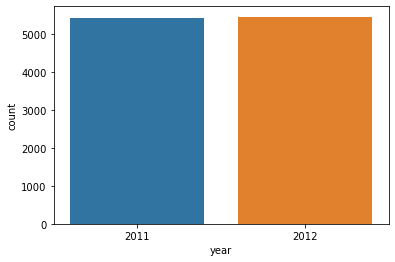

In [10]:
sns.countplot(df['year'])

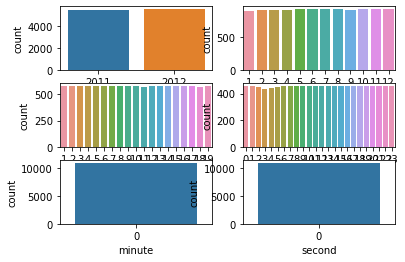

In [11]:
plt.subplot(3, 2, 1)
sns.countplot(df['year'])

plt.subplot(3, 2, 2)
sns.countplot(df['month'])

plt.subplot(3, 2, 3)
sns.countplot(df['day'])

plt.subplot(3, 2, 4)
sns.countplot(df['hour'])

plt.subplot(3, 2, 5)
sns.countplot(df['minute'])

plt.subplot(3, 2, 6)
sns.countplot(df['second'])

## (4) X, y 컬럼 선택 및 train/test 데이터 분리
- X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기
- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

----

- info()를 통해서 데이터들의 type을 확인 (문자열 데이터 확인)
- train['datetime'].dt.weekday 활용, 요일에 대한 정보 추가
- 학습 데이터 및 RMSE값
    1. 요일, 시간, 날씨
        - 167.031365422865
    2. 요일, 시간, 날씨 + **temp**
        - 155.26878251118987
    3. 요일, 시간, 날씨 + **humidity**
        - 163.28265800809078
    4. 요일, 시간, 날씨 + **humidity + temp,atemp + season**
        - 149.625184945586

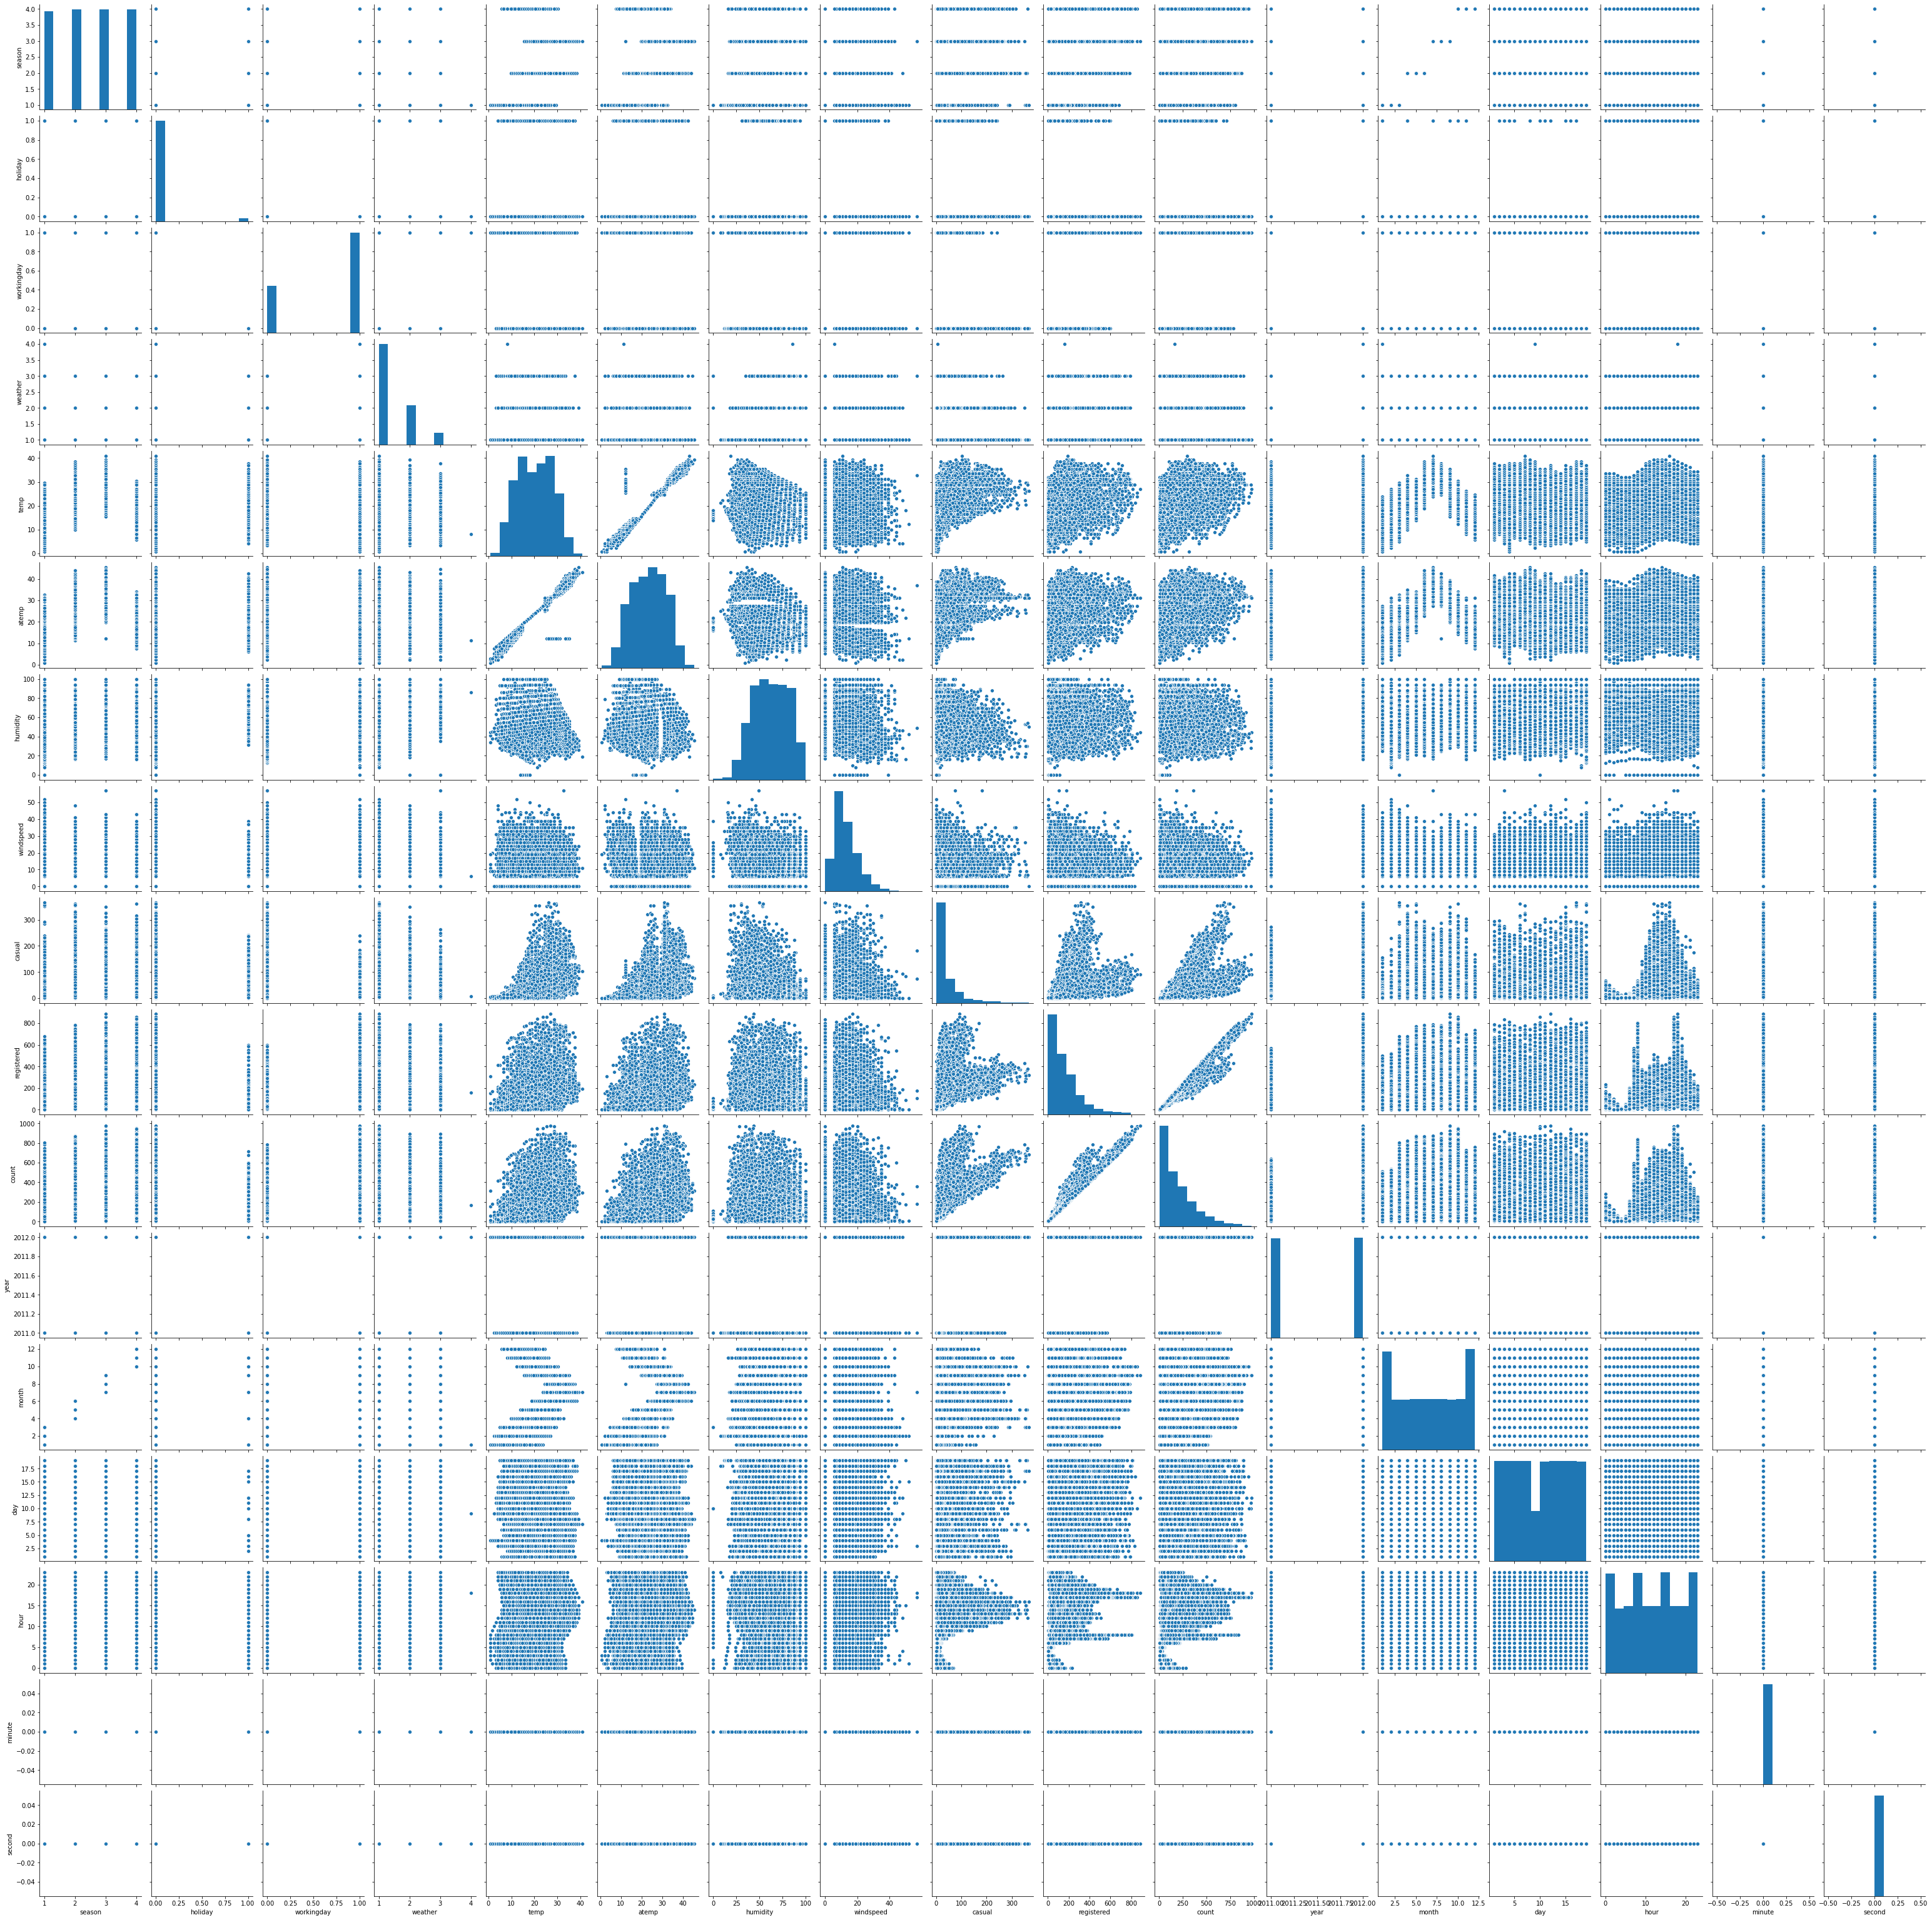

In [12]:
sns.pairplot(df)

In [13]:
df.info()    # df = 전체 train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [14]:
df['datetime'].dt.weekday    # 요일 정보

0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: datetime, Length: 10886, dtype: int64

**Model_train 함수 작성**
1. train_test_split: datasets 나누기
2. LinearRegression model 생성
3. 학습(model.fit())
4. 예측(y_pred)
5. MSE, RMSE 확인

In [53]:
def model_train(X, y) :
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    
    return score, np.sqrt(score), y_test, y_pred, X_test

----

**1) 요일, hour, weather**

In [54]:
day = df['datetime'].dt.weekday
X = pd.concat([df['hour'], df['weather'], df['datetime'].dt.weekday], axis=1, ignore_index=False)
y = df['count']


In [55]:
X, y

(       hour  weather  datetime
 0         0        1         5
 1         1        1         5
 2         2        1         5
 3         3        1         5
 4         4        1         5
 ...     ...      ...       ...
 10881    19        1         2
 10882    20        1         2
 10883    21        1         2
 10884    22        1         2
 10885    23        1         2
 
 [10886 rows x 3 columns],
 0         16
 1         40
 2         32
 3         13
 4          1
         ... 
 10881    336
 10882    241
 10883    168
 10884    129
 10885     88
 Name: count, Length: 10886, dtype: int64)

In [57]:
mse_score, rmse_score, y_test, y_pred, X_test = model_train(X, y)
print("MSE: {:.4f}\nRMSE: {:.4f}".format(mse_score, rmse_score))

MSE: 27899.4770
RMSE: 167.0314


**2) 요일, hour, weather, temp**
- 1)에서 **temp** 추가

In [58]:
X = pd.concat([df['hour'], df['weather'], df['datetime'].dt.weekday, df['temp']], axis=1, ignore_index=False)

In [59]:
X, y

(       hour  weather  datetime   temp
 0         0        1         5   9.84
 1         1        1         5   9.02
 2         2        1         5   9.02
 3         3        1         5   9.84
 4         4        1         5   9.84
 ...     ...      ...       ...    ...
 10881    19        1         2  15.58
 10882    20        1         2  14.76
 10883    21        1         2  13.94
 10884    22        1         2  13.94
 10885    23        1         2  13.12
 
 [10886 rows x 4 columns],
 0         16
 1         40
 2         32
 3         13
 4          1
         ... 
 10881    336
 10882    241
 10883    168
 10884    129
 10885     88
 Name: count, Length: 10886, dtype: int64)

In [61]:
mse_score, rmse_score, y_test, y_pred, X_test = model_train(X, y)
print("MSE: {:.4f}\nRMSE: {:.4f}".format(mse_score, rmse_score))

MSE: 24108.3948
RMSE: 155.2688


**3) 요일, hour, weather, humidity**
- 1)에서 **humidity** 추가

In [62]:
X = pd.concat([df['hour'], df['weather'], df['datetime'].dt.weekday, df['humidity']], axis=1, ignore_index=False)

In [63]:
X, y

(       hour  weather  datetime  humidity
 0         0        1         5        81
 1         1        1         5        80
 2         2        1         5        80
 3         3        1         5        75
 4         4        1         5        75
 ...     ...      ...       ...       ...
 10881    19        1         2        50
 10882    20        1         2        57
 10883    21        1         2        61
 10884    22        1         2        61
 10885    23        1         2        66
 
 [10886 rows x 4 columns],
 0         16
 1         40
 2         32
 3         13
 4          1
         ... 
 10881    336
 10882    241
 10883    168
 10884    129
 10885     88
 Name: count, Length: 10886, dtype: int64)

In [65]:
mse_score, rmse_score, y_test, y_pred, X_test = model_train(X, y)
print("MSE: {:.4f}\nRMSE: {:.4f}".format(mse_score, rmse_score))

MSE: 26661.2264
RMSE: 163.2827


**4) 요일, hour, weather, humidity, temp**
- 1)에서 **humidity, temp** 추가

In [66]:
X = pd.concat([df['hour'], df['weather'], df['datetime'].dt.weekday, df['humidity'], df['temp']], axis=1, ignore_index=False)


In [67]:
X, y

(       hour  weather  datetime  humidity   temp
 0         0        1         5        81   9.84
 1         1        1         5        80   9.02
 2         2        1         5        80   9.02
 3         3        1         5        75   9.84
 4         4        1         5        75   9.84
 ...     ...      ...       ...       ...    ...
 10881    19        1         2        50  15.58
 10882    20        1         2        57  14.76
 10883    21        1         2        61  13.94
 10884    22        1         2        61  13.94
 10885    23        1         2        66  13.12
 
 [10886 rows x 5 columns],
 0         16
 1         40
 2         32
 3         13
 4          1
         ... 
 10881    336
 10882    241
 10883    168
 10884    129
 10885     88
 Name: count, Length: 10886, dtype: int64)

In [69]:
mse_score, rmse_score, y_test, y_pred, X_test = model_train(X, y)
print("MSE: {:.4f}\nRMSE: {:.4f}".format(mse_score, rmse_score))

MSE: 22934.6071
RMSE: 151.4418


**5) 요일, hour, weather, humidity, temp, atemp, season**
- 1)에서 **humidity, temp, atemp, season** 추가

In [70]:
X = pd.concat([df['hour'], df['weather'], df['datetime'].dt.weekday, df['humidity'], df['temp'], df['atemp'], df['season']], axis=1, ignore_index=False)



In [71]:
X, y

(       hour  weather  datetime  humidity   temp   atemp  season
 0         0        1         5        81   9.84  14.395       1
 1         1        1         5        80   9.02  13.635       1
 2         2        1         5        80   9.02  13.635       1
 3         3        1         5        75   9.84  14.395       1
 4         4        1         5        75   9.84  14.395       1
 ...     ...      ...       ...       ...    ...     ...     ...
 10881    19        1         2        50  15.58  19.695       4
 10882    20        1         2        57  14.76  17.425       4
 10883    21        1         2        61  13.94  15.910       4
 10884    22        1         2        61  13.94  17.425       4
 10885    23        1         2        66  13.12  16.665       4
 
 [10886 rows x 7 columns],
 0         16
 1         40
 2         32
 3         13
 4          1
         ... 
 10881    336
 10882    241
 10883    168
 10884    129
 10885     88
 Name: count, Length: 10886, dtype: i

In [73]:
mse_score, rmse_score, y_test, y_pred, X_test = model_train(X, y)
print("MSE : {:.4f}\nRMSE : {:.4f}".format(mse_score, rmse_score))

MSE : 22387.6960
RMSE : 149.6252


## 예측결과 시각화
- 5가지 변수의 활용 중에서 RMSE 스코어가 가장 낮은 값으로 예측 결과 사용

    1. x축: X 데이터 중 **temp** 데이터    
       y축: **count**
    2. x축: X 데이터 중 **humidity** 데이터   
       y축: **count**

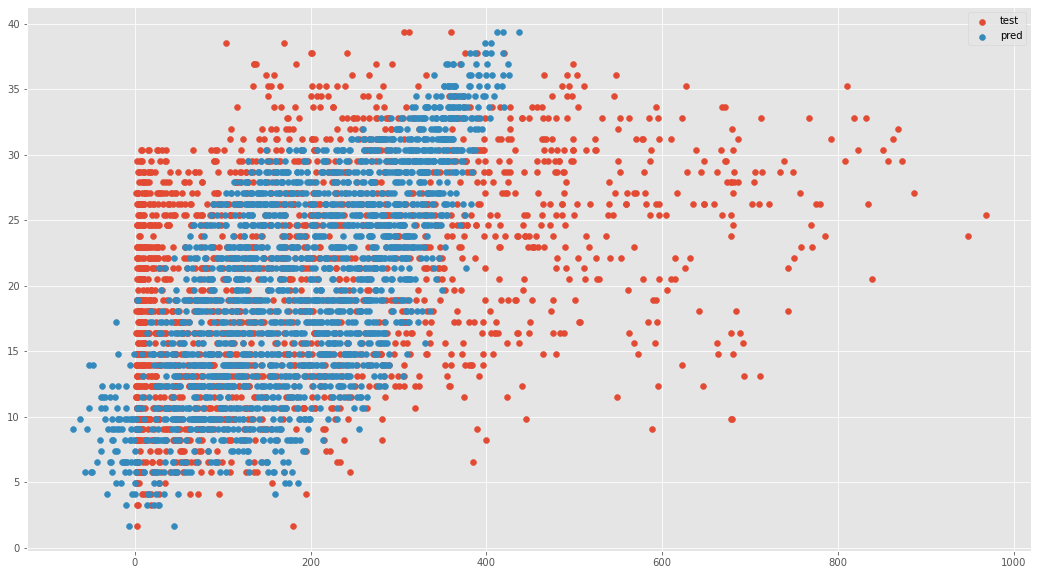

In [74]:
plt.style.use('ggplot')
plt.figure(figsize=(18, 10))
plt.scatter(y_test, X_test['temp'], label="test")
plt.scatter(y_pred, X_test['temp'], label="pred")
plt.legend()

plt.show()

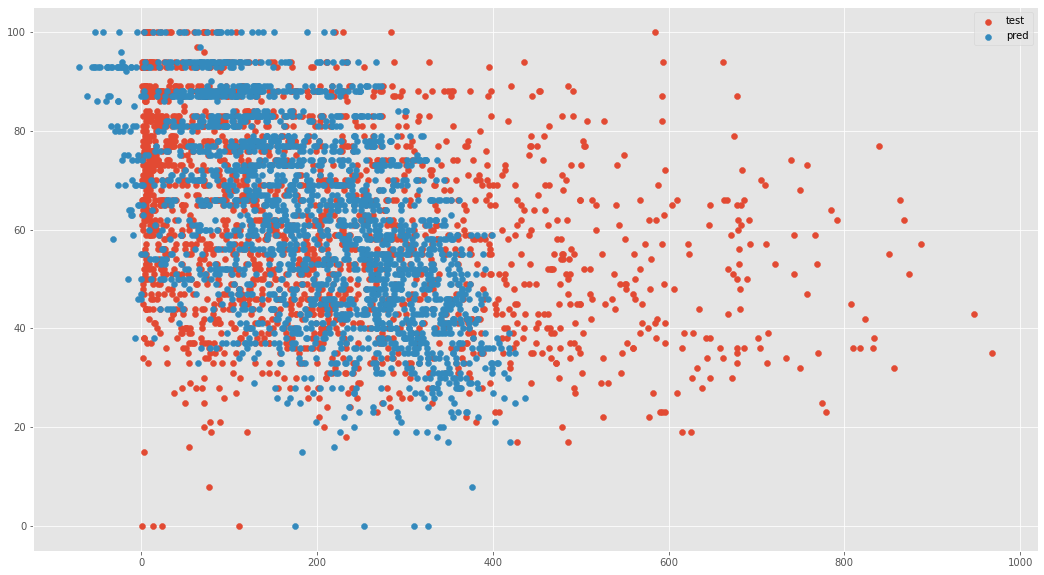

In [75]:
plt.style.use('ggplot')
plt.figure(figsize=(18, 10))
plt.scatter(y_test, X_test['humidity'], label="test")
plt.scatter(y_pred, X_test['humidity'], label="pred")
plt.legend()

plt.show()

## 결과 및 정리
**학습 데이터 별 RMSE값**
1. 요일, hour, weather
    - RMSE: 167.0314
2. 요일, hour, weather, temp
    - RMSE: 155.2688
3. 요일, hour, weather, humidity
    - RMSE: 163.2827
4. 요일, hour, weather, humidity, temp
    - RMSE: 151.4418
5. 요일, hour, weather, temp, ateamp, season
    - RMSE: **149.6252**